In [32]:
%run IDM_helper_functions.ipynb

In [33]:
# Training data  52500, W_neg = 8400
n_sim_train = 20000
prior_IDM = utils.BoxUniform(low=[8200], high=[8600])
param_IDM = prior_IDM.sample((n_sim_train,))
x_IDM_train = simul_IDM_EM1(np.array(param_IDM))



sim0
sim1000
sim2000
sim3000
sim4000
sim5000
sim6000
sim7000
sim8000
sim9000
sim10000
sim11000
sim12000
sim13000
sim14000
sim15000
sim16000
sim17000
sim18000
sim19000


In [34]:
# Train MNLE and obtain MCMC-based posterior.

trainer = MNLE(prior=prior_IDM)
trainer = trainer.append_simulations(param_IDM, x_IDM_train)
mnle = trainer.train()


 Neural network successfully converged after 37 epochs.

In [35]:
#
mcmc_parameters = dict(num_chains=50,thin=10,warmup_steps=50,init_strategy="proposal")
#mcmc_parameters=dict(init_strategy="resample", num_chains=10, warmup_steps=100)
#mnle_posterior = trainer.build_posterior(mnle, prior)


In [36]:
# inference with different x_o that has 100 trials
#torch.manual_seed(41)
num_trials = 300
num_samples = 200
parameters_o = prior_IDM.sample((1,))
x_o = simul_IDM_EM1(np.array(parameters_o.repeat(num_trials, 1)))

sim0


In [37]:
mnle_posterior = trainer.build_posterior(mnle, prior_IDM,mcmc_method="slice_np_vectorized", 
                                             mcmc_parameters=mcmc_parameters)
mnle_samples = mnle_posterior.sample((num_samples,), x=x_o)

Running vectorized MCMC with 50 chains:   0%|          | 0/27000 [00:00<?, ?it/s]

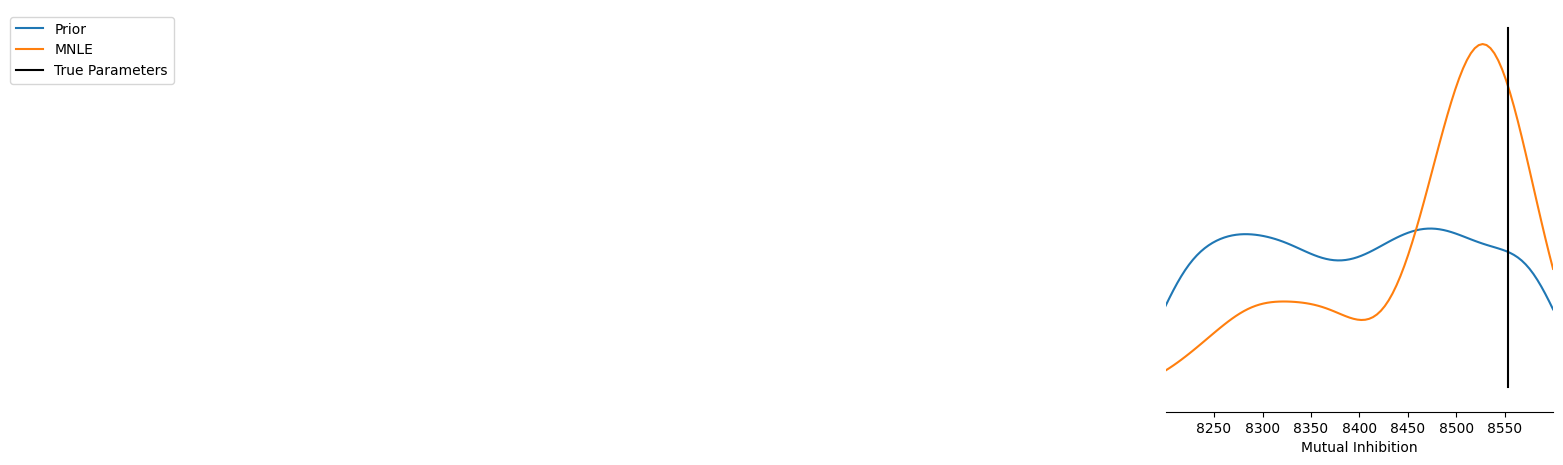

In [38]:
# num_trials = 300
pair_plot(prior_IDM, mnle_samples, parameters_o, figsize = (5,5), contour = 0.7, 
          labels=["Mutual Inhibition"])


In [46]:
n_trials = 500
num_samples = 500
sim_num = 20
#prior_IDM = utils.BoxUniform(low=[51000,8000], high=[54000,8800])
param_IDM = prior_IDM.sample((sim_num,))
par_fitted = np.zeros((sim_num,param_IDM.shape[1]))

0
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([8426.8008])
[8316.712]
1
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([8574.4639])
[8536.621]
2
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([8498.0234])
[8512.106]
3
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([8503.7051])
[8393.246]
4
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([8457.3125])
[8492.097]
5
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([8368.2012])
[8422.531]
6
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([8366.7197])
[8361.433]
7
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([8297.1709])
[8332.847]
8
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([8526.0205])
[8448.136]
9
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([8283.7383])
[8384.945]
10
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([8311.0977])
[8421.762]
11
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([8519.7637])
[8558.881]
12
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([8412.3936])
[8406.709]
13
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([8238.4688])
[8296.08]
14
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([8581.6074])
[8536.693]
15
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([8369.6885])
[8458.202]
16
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([8299.6465])
[8371.855]
17
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([8271.9248])
[8341.18]
18
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([8531.3809])
[8495.606]
19
sim0


Running vectorized MCMC with 10 chains:   0%|          | 0/10000 [00:00<?, ?it/s]

tensor([8377.5098])
[8452.874]


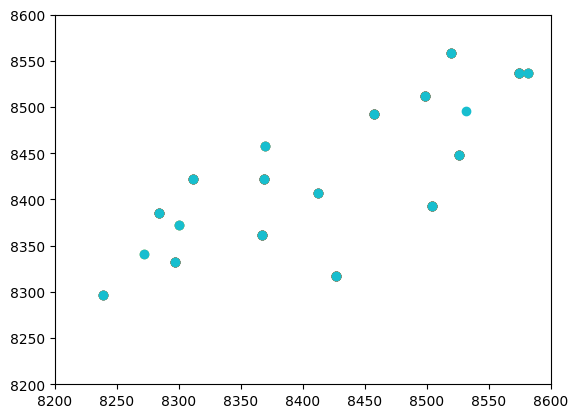

In [47]:

for i in range(sim_num):
    print(i)
    IDM_o = simul_IDM_EM1(np.tile(param_IDM[i,:], (n_trials,1))) # 

    mcmc_parameters = dict(num_chains=10,thin=10,warmup_steps=50,init_strategy="proposal")
    mnle_posterior = trainer.build_posterior(mnle, 
                                             prior_IDM, 
                                             mcmc_method="slice_np_vectorized", 
                                             mcmc_parameters=mcmc_parameters)
    
    # get the posterior samples
    mnle_samples = mnle_posterior.sample((num_samples,), x=IDM_o)
    post_mean = np.array(mnle_samples.mean(axis = 0))
    
    print(param_IDM[i,:])
    print(post_mean)
    plt.scatter(param_IDM[0:(i+1),:], par_fitted[0:(i+1),:])
    plt.xlim(8200,8600)
    plt.ylim(8200,8600)
    
    par_fitted[i,:] = post_mean

(8200.0, 8600.0)

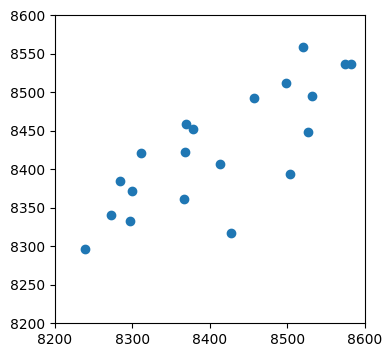

In [57]:
plt.figure(figsize=(4,4))
plt.scatter(param_IDM[:,:], par_fitted[:,:])
plt.xlim(8200,8600)
plt.ylim(8200,8600)
